<a href="https://colab.research.google.com/github/adenugroho/Penugasan-RPL/blob/main/UAS_RPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("/content/drive/MyDrive/Kuliah 23/Semester 3/RPL/full_data.csv")
df.columns = df.columns.str.strip()

print(df.shape)

print(df.isna().sum())

(4981, 11)
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [27]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [28]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [29]:
df.drop(["age"], axis=1)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
4976,Male,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

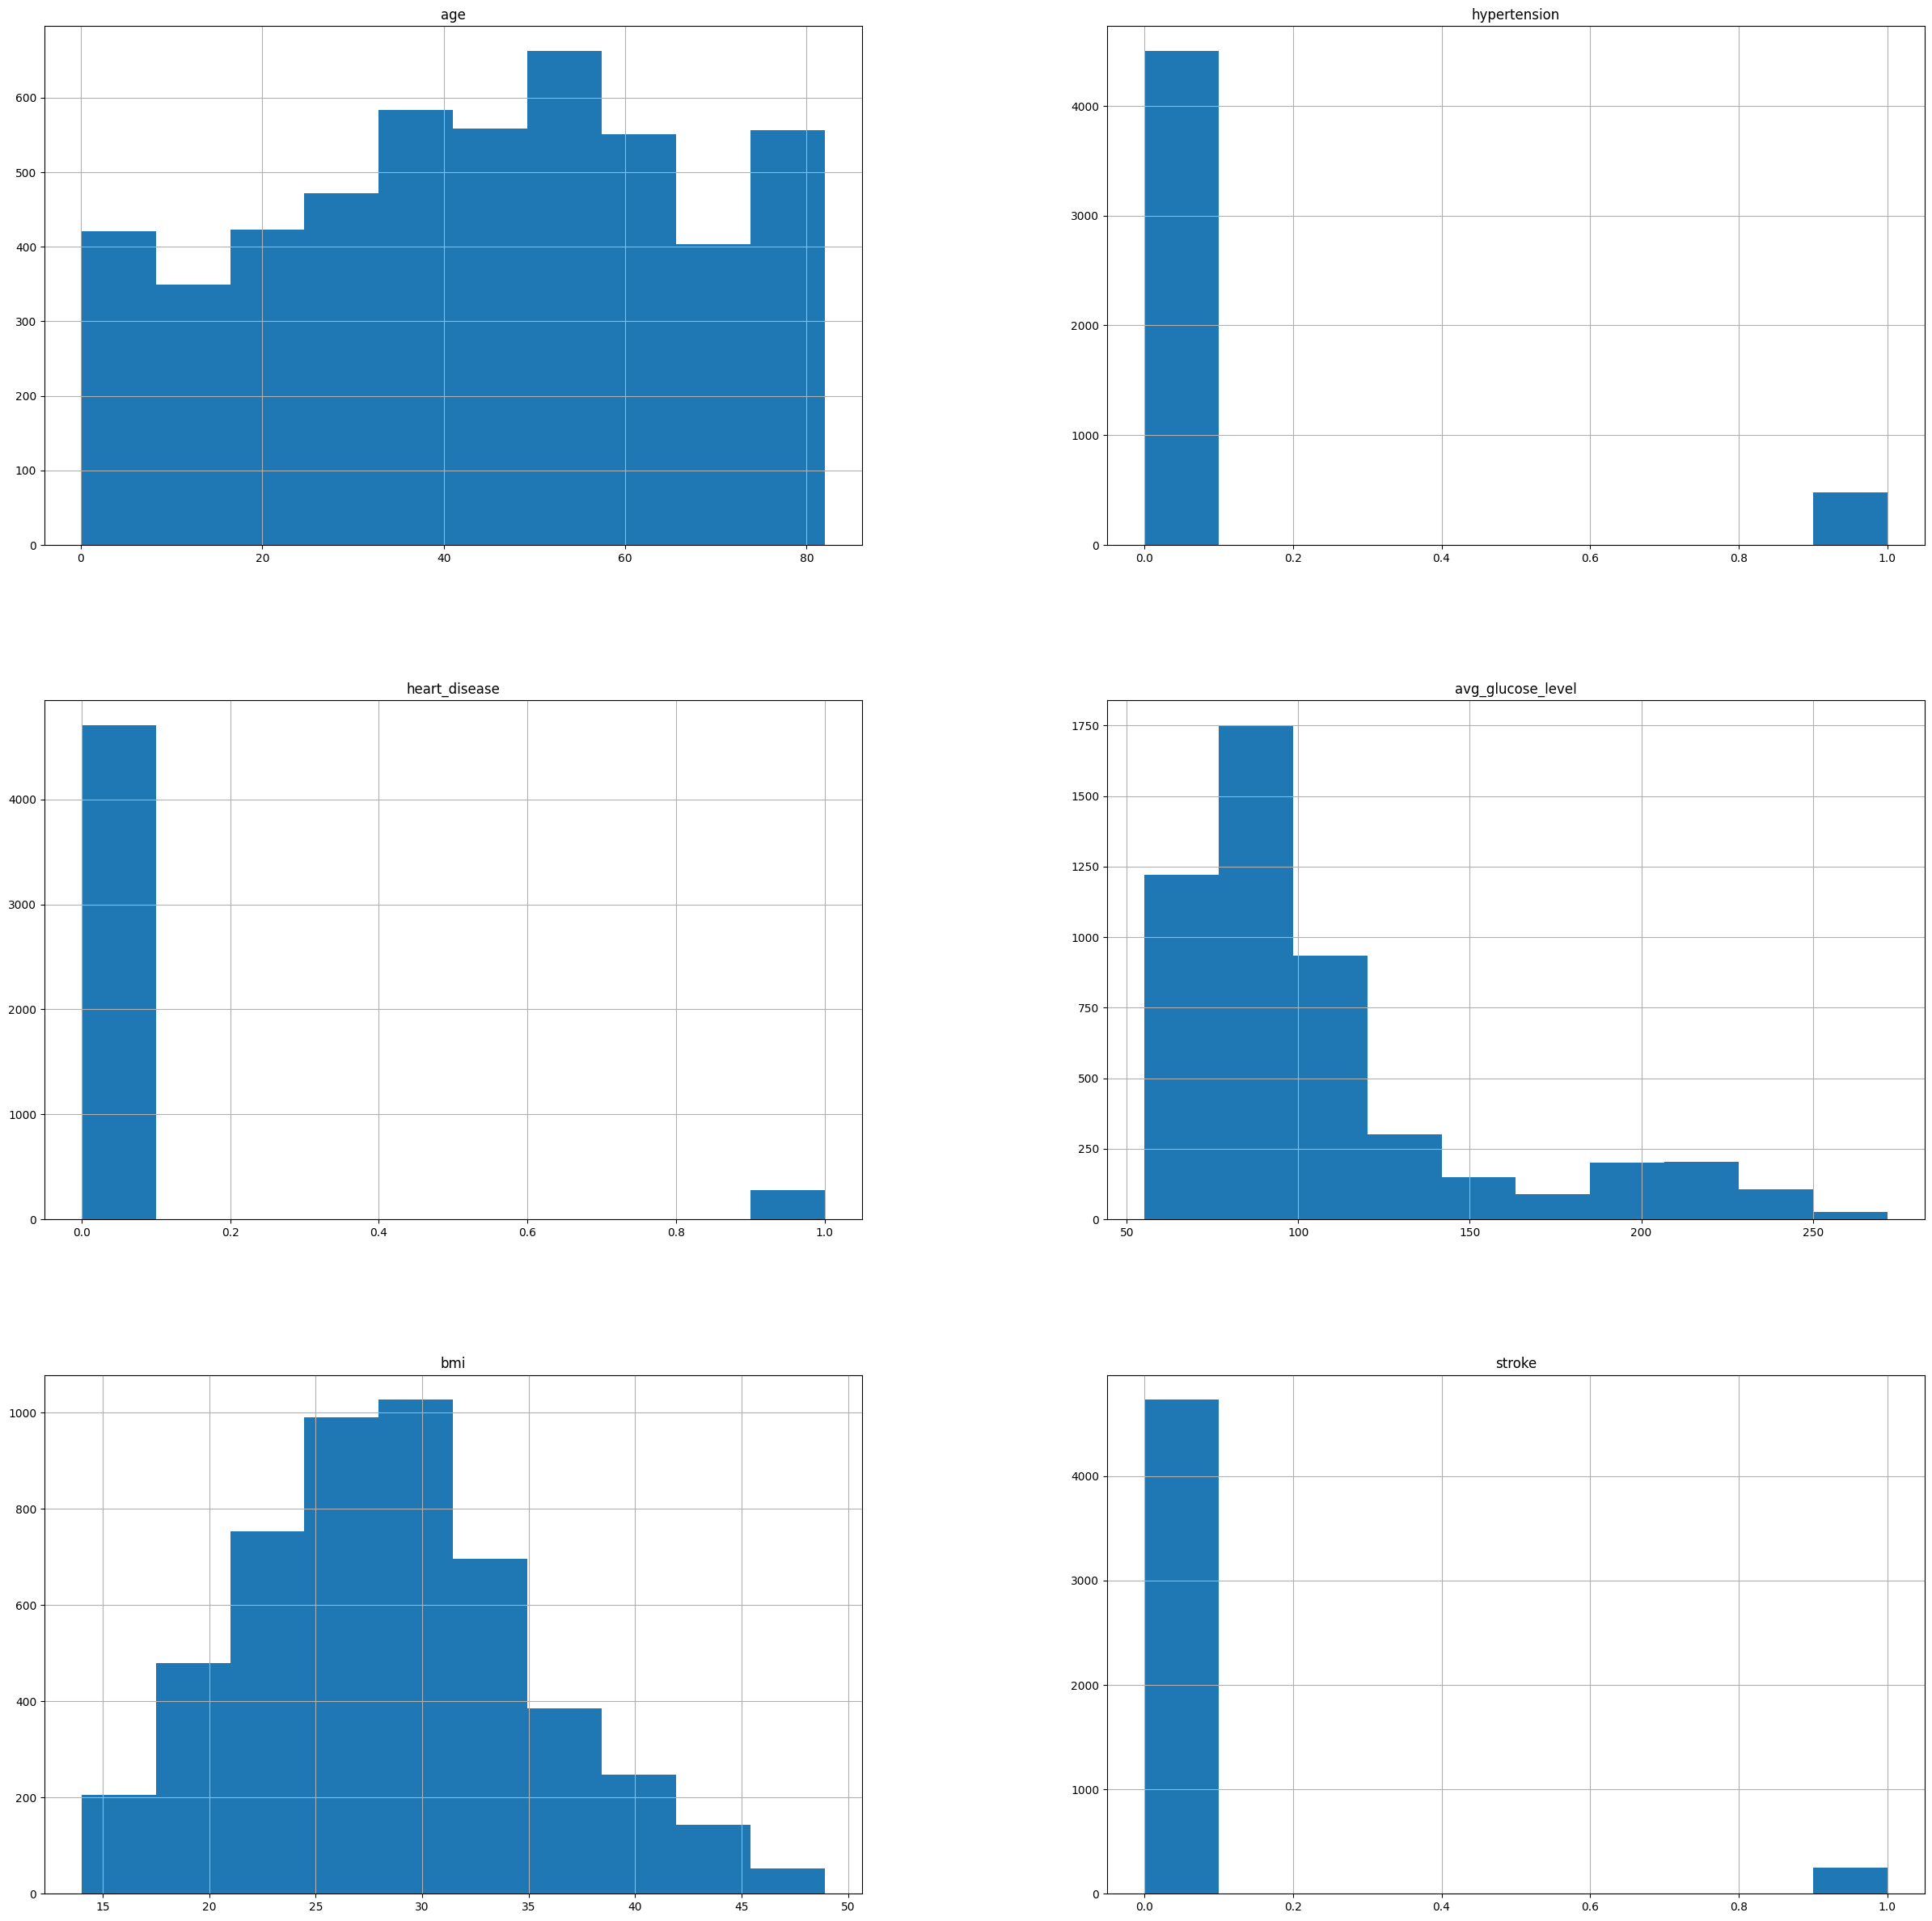

In [30]:
df.hist(figsize=[30,30])

In [31]:
df['Residence_type'] = df["Residence_type"].map({'Urban':1, 'Rural':0})
df['gender'] = df["gender"].map({'Male':1, 'Female':0})
df['ever_married'] = df["ever_married"].map({'Yes':1, 'No':0})
df['work_type'] = df["work_type"].map({'Private':1, 'Self-employed':0})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1.0,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,1.0,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,1.0,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,0.0,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,1.0,1,186.21,29.0,formerly smoked,1


In [33]:
selected_fiture = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
x = df[selected_fiture]  # Fitur
y = df["stroke"]  # Label

In [87]:
#training testing Data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

print(x_train)
print(x_test)
print(y_test)
print(y_train)

      gender  hypertension  heart_disease  ever_married  Residence_type
4606       0             0              0             1               1
1338       0             0              0             1               0
2782       0             0              0             1               0
1471       0             0              0             0               1
829        0             0              0             1               1
...      ...           ...            ...           ...             ...
4931       1             0              0             1               0
3264       1             0              0             1               0
1653       0             0              0             1               1
2607       1             0              0             1               1
2732       0             0              0             0               0

[3984 rows x 5 columns]
      gender  hypertension  heart_disease  ever_married  Residence_type
1366       0             0             

In [88]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
y_test

1366    0
4398    0
3188    0
4891    0
4156    0
       ..
4016    0
1540    0
3145    0
3789    0
3546    0
Name: stroke, Length: 997, dtype: int64

In [94]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[947,   0],
       [ 50,   0]])

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Inisialisasi model Naive Bayes
model_nb = GaussianNB()

# Melatih model
model_nb.fit(x_train, y_train)

# Membuat prediksi
y_pred = model_nb.predict(x_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes: ", accuracy)

Akurasi Naive Bayes:  0.8595787362086259


In [102]:
models={
    'GaussianNB': GaussianNB()
}

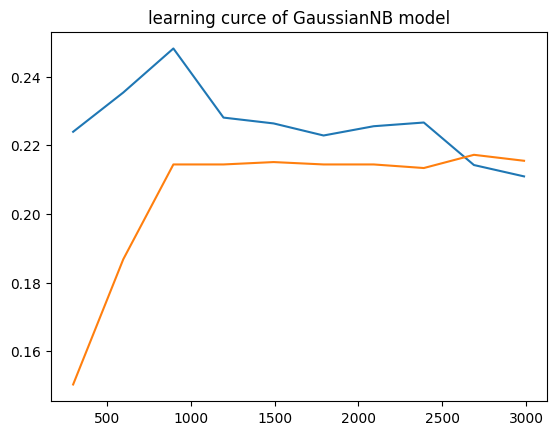

In [103]:
from sklearn.model_selection import learning_curve
for name,model in models.items():

    model.fit(x_train, y_train)

    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))

    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(f'learning curce of {name} model')
    plt.show()